<a href="https://colab.research.google.com/github/Mayanzev/Telecom/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import Spectrum, Wave, Noise
from thinkdsp import decorate, read_wave, unbias, normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# **Упражнение 4.1**
На сайте Soft Murmur можно послушать множество природных источников шума, включая дождь, волны, ветер и др. На веб-странице http://asoftmurmur.com/about/ приведен перечень записей; большинство из них хранится на http://freesound.org.
Скачайте некоторые из этих файлов и вычислите спектры каждого сигнала. Похож ли их спектр мощности на белый, розовый или броуновский шум? Как спектр меняется во времени?

С сайта http://asoftmurmur.com/about/ были выбраны звук ветра, костра и моря. Послушаем их и проанализируем спектры.

In [ ]:
if not os.path.exists('105272__inchadney__strong-wind-in-the-forest.wav'):
  !wget https://github.com/Mayanzev/Telecom/releases/download/v1.0.0/105272__inchadney__strong-wind-in-the-forest.wav

if not os.path.exists('132534__inchadney__fireplace.wav'):
  !wget https://github.com/Mayanzev/Telecom/releases/download/v1.0.0/132534__inchadney__fireplace.wav

if not os.path.exists('13793__soarer__north-sea.wav'):
  !wget https://github.com/Mayanzev/Telecom/releases/download/v1.0.0/13793__soarer__north-sea.wav

In [ ]:
fireplace_segment = read_wave('132534__inchadney__fireplace.wav').segment(start=2.0, duration=1.0)
fireplace_segment.make_audio()

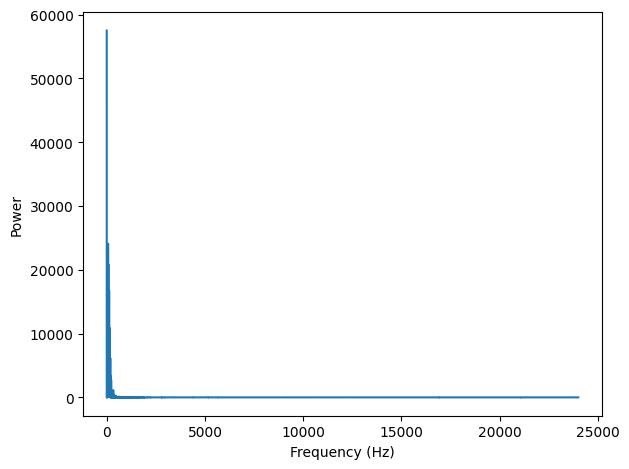

In [ ]:
fireplace_spectrum = fireplace_segment.make_spectrum()
fireplace_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power')

Можно увидеть, что амплитуда уменьшается с ростом частоты, поэтому это может быть красный или розовый шум. Мы можем проверить это, посмотрев на спектр мощности в логарифмическом масштабе.

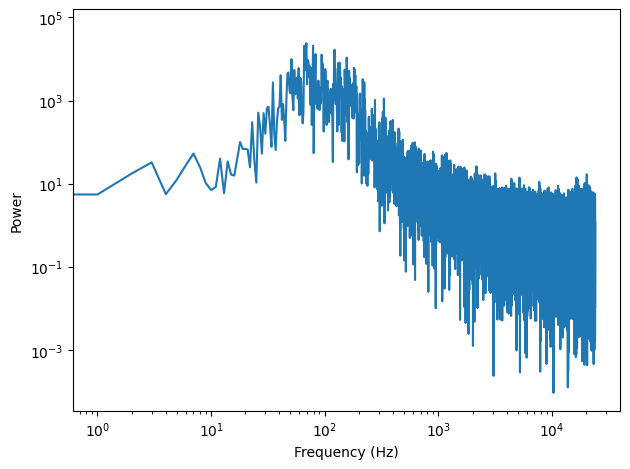

In [ ]:
fireplace_spectrum.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
fireplace_spectrum.estimate_slope().slope

-0.7988939343019013

К частоте 10^2 наблюдается рост мощности, а потом практически линейный спад. Данный график наиболее напоминает график розового шума. Нужно попробовать взять более поздний сегмент.

In [ ]:
fireplace_segment2 = read_wave('132534__inchadney__fireplace.wav').segment(start=6.0, duration=1.0)
fireplace_segment2.make_audio()

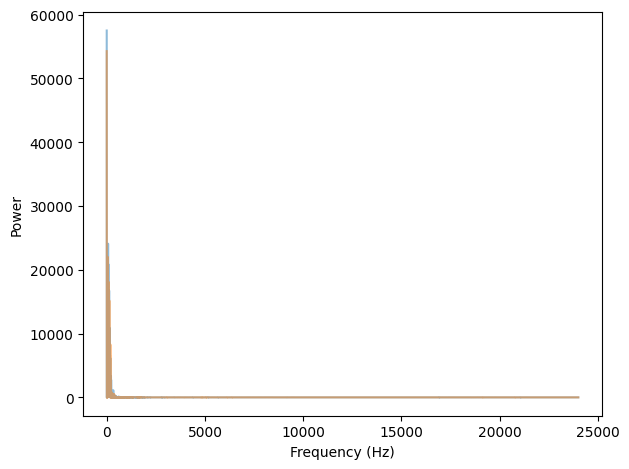

In [ ]:
fireplace_spectrum2 = fireplace_segment2.make_spectrum()
fireplace_spectrum.plot_power(alpha=0.5)
fireplace_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Power')

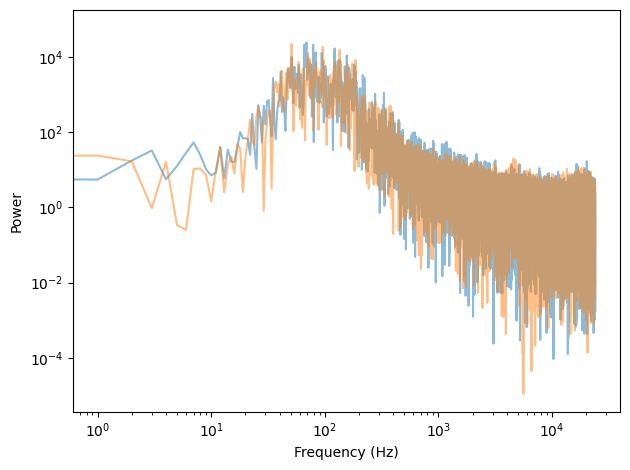

In [ ]:
fireplace_spectrum.plot_power(alpha=0.5)
fireplace_spectrum2.plot_power(alpha=0.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
fireplace_spectrum2.estimate_slope().slope

-0.7513172264449723

Можно заметить, структура спектра не имеет сильных изменений.

Теперь попробуем проверить другой звук.

In [ ]:
sea_segment = read_wave('13793__soarer__north-sea.wav').segment(start=2.0, duration=1.0)
sea_segment.make_audio()

In [ ]:
sea_segment2 = read_wave('13793__soarer__north-sea.wav').segment(start=6.0, duration=1.0)
sea_segment2.make_audio()

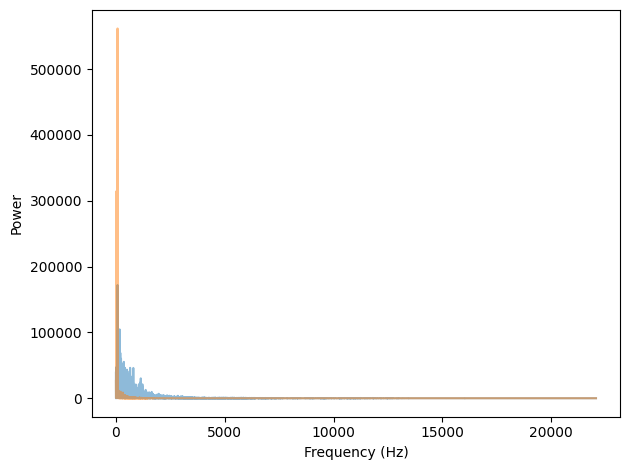

In [ ]:
sea_spectrum = sea_segment.make_spectrum()
sea_spectrum2 = sea_segment2.make_spectrum()
sea_spectrum.plot_power(alpha=0.5)
sea_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Power')

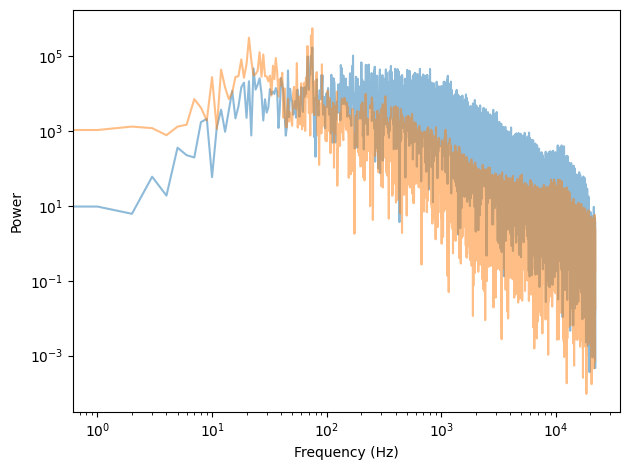

In [ ]:
sea_spectrum.plot_power(alpha=0.5)
sea_spectrum2.plot_power(alpha=0.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
sea_spectrum.estimate_slope().slope

-2.101639687951575

In [ ]:
sea_spectrum2.estimate_slope().slope

-1.5160756308580368

Cпектр во времени подвержен изменениям. Судя по графику, можно с большой вероятностью сказать, что это розовый шум, хоть синий граф немного похож на красный шум.

Теперь попробуем проверить последний звук.

In [ ]:
wind_segment = read_wave('105272__inchadney__strong-wind-in-the-forest.wav').segment(start=2.0, duration=1.0)
wind_segment.make_audio()

In [ ]:
wind_segment2 = read_wave('105272__inchadney__strong-wind-in-the-forest.wav').segment(start=6.0, duration=1.0)
wind_segment2.make_audio()

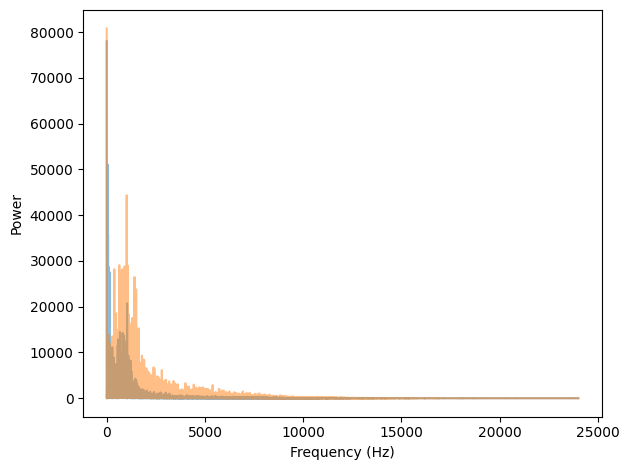

In [ ]:
wind_spectrum = wind_segment.make_spectrum()
wind_spectrum2 = wind_segment2.make_spectrum()
wind_spectrum.plot_power(alpha=0.5)
wind_spectrum2.plot_power(alpha=0.5)
decorate(xlabel='Frequency (Hz)', ylabel='Power')

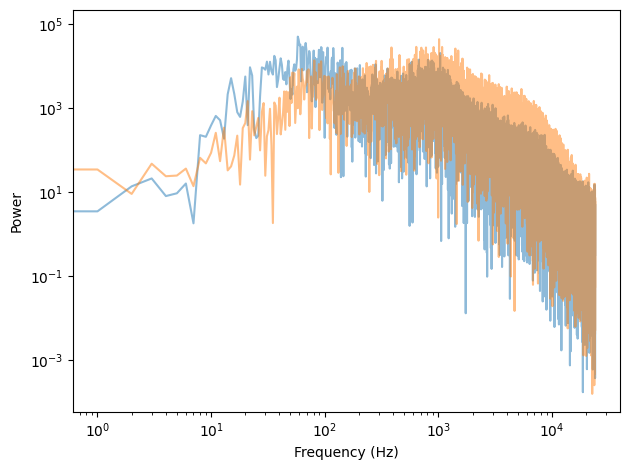

In [ ]:
wind_spectrum.plot_power(alpha=0.5)
wind_spectrum2.plot_power(alpha=0.5)
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
wind_segment.estimate_slope().slope

-1.9718987756313575

In [ ]:
wind_segment2.estimate_slope().slope

-2.1724379031082193

В данном случае видно некоторое небольшое изменение спектра. Данный график я бы отнес больше к красному шуму.

# **Упражнение 4.2**
В шумовом сигнале частотный состав меняется во времени. На большом интервале мощность на всех частотах одинакова, а на коротком мощность на каждой частоте случайна.

Для оценки долговременной средней мощности на каждой частоте можно разорвать сигнал на сегменты, вычислить спектр мощности для каждого сегмента, а затем найти среднее по сегментам.

Реализуйте метод Бартлетта и используйте его для оценки спектра мощности шумового сигнала. Подсказка: посмотрите на реализацию make_spectrogram.

Код метода Бартлетта

In [ ]:
def bartlett_method(wave, seg_length=512, win_flag=True):
    spectro = wave.make_spectrogram(seg_length, win_flag)
    spectrums = spectro.spec_map.values()

    psds = [spectrum.power for spectrum in spectrums]

    hs = np.sqrt(sum(psds) / len(psds))
    fs = next(iter(spectrums)).fs

    spectrum = Spectrum(hs, fs, wave.framerate)
    return spectrum

Исследуем работу алгоритма на используемых выше сегментах.

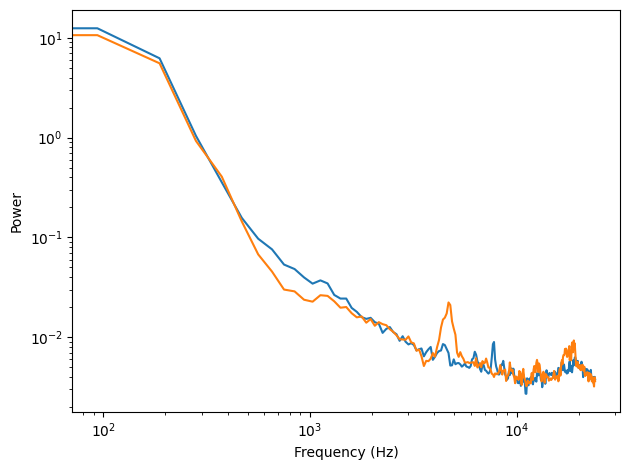

In [ ]:
fireplace_res = bartlett_method(fireplace_segment)
fireplace_res2 = bartlett_method(fireplace_segment2)

sea_res = bartlett_method(sea_segment)
sea_res2 = bartlett_method(sea_segment2)

wind_res = bartlett_method(wind_segment)
wind_res2 = bartlett_method(wind_segment2)

fireplace_res.plot_power()
fireplace_res2.plot_power()
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

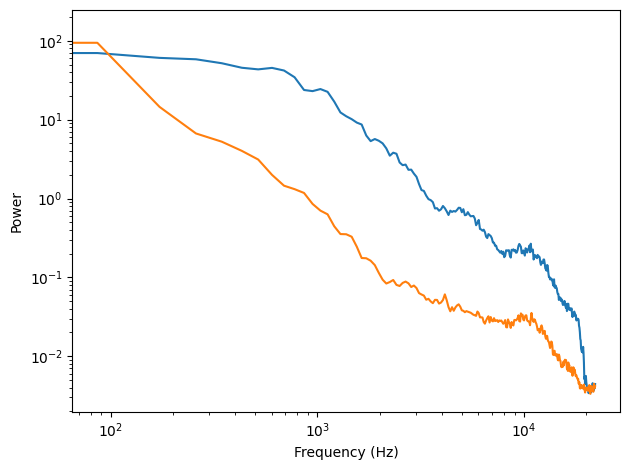

In [ ]:
sea_res.plot_power()
sea_res2.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **dict(xscale='log', yscale='log'))

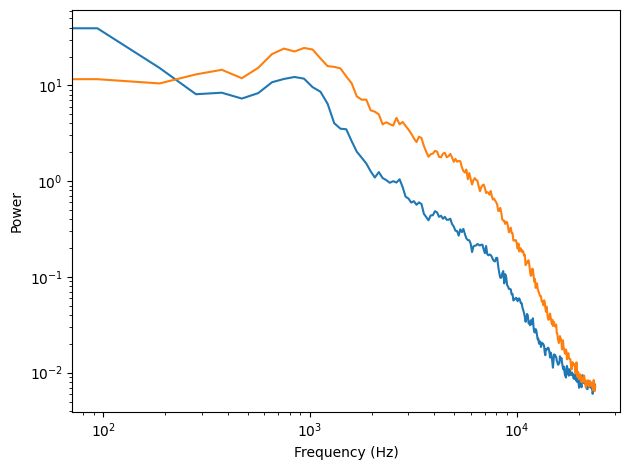

In [ ]:
wind_res.plot_power()
wind_res2.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **dict(xscale='log', yscale='log'))

Теперь мы можем более четко увидеть зависимость между мощностью и частотой.

На основе новых графиков можно заметить, что они имеют более сложную структуру, чем кажется изначально. Даже сейчас точно сказать, были ли верны мои предположения - сложно, однако они приближены к реальности.

# **Упражнение 4.3**
На веб-странице http://www.coindesk.com/price можно скачать в в виде CSV-файла исторические данные о ежедневной цене BitCoin. Откройте этот файл и вычислите спектр цен BitCoin как функцию времени. Похоже ли это на белый, розовый или броуновский шум?

In [ ]:
if not os.path.exists('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv'):
  !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv

--2024-03-31 18:19:54--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv [following]
--2024-03-31 18:19:54--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143622 (140K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 140.26K  --.-KB/s    in 0.02

Возьмем данные, скачанные за 2013-2020 года, с репозитория.

In [ ]:
data = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv', parse_dates=[0])
data

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2354,BTC,2020-03-22,5884.340133,6187.042146,6431.873162,5802.553402
2355,BTC,2020-03-23,6455.454688,5829.352511,6620.858253,5694.198299
2356,BTC,2020-03-24,6784.318011,6455.450650,6863.602196,6406.037439
2357,BTC,2020-03-25,6706.985089,6784.325204,6981.720386,6488.111885


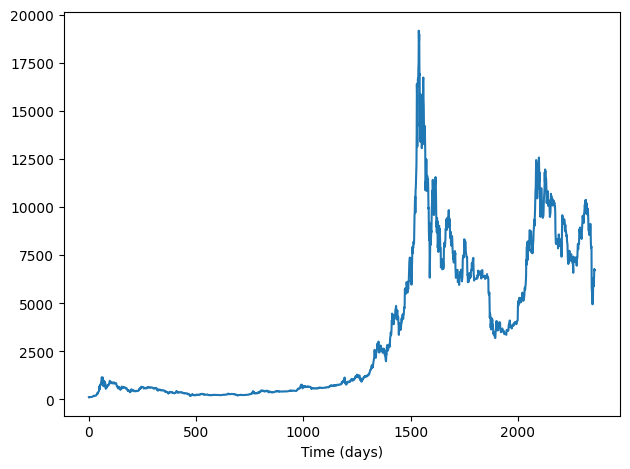

In [ ]:
btc_wave = Wave(data['Closing Price (USD)'], data.index, framerate = 1)
btc_wave.plot()
decorate(xlabel='Time (days)')

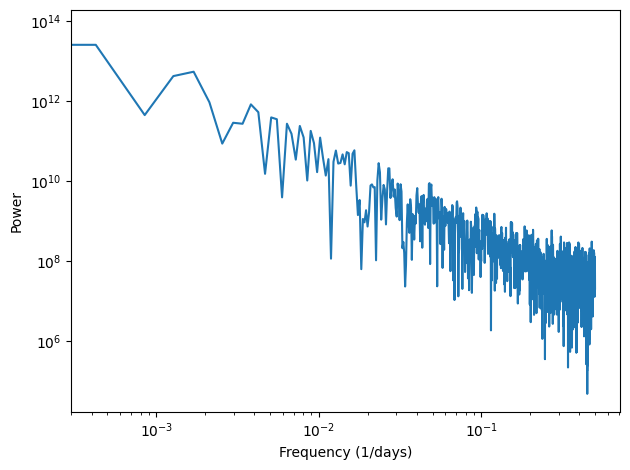

In [ ]:
btc_spectrum = btc_wave.make_spectrum()
btc_spectrum.plot_power()
decorate(xlabel='Frequency (1/days)', ylabel='Power', **loglog)

In [ ]:
btc_spectrum.estimate_slope().slope

-1.7332540936758951

Имеем наклон -1.8. Это близко к Броуновскому шуму.

# **Упражнение 4.4**
Счетчик Гейгера - прибор для обнаружения радиации. Когда ионизирующие частицы попадают в детектор, на его выходе появляются импульсы тока. Общий выход в определенный момент времени можно смоделировать некоррелированным пуассоновым шумом (UP), где каждая выборка есть случайное число из распределения Пуассона, соответствующее количеству частиц, обнаруженных за интервал измерения.

Напишите класс, называемый UncorrelatedPoissonNoise, наследующий thinkdsp._Noise и предоставляющий evaluate. Следует использовать Np.random.poisson для генерации случайный величин из распределения Пуассона. Параметр этой функции lam - это среднее число частиц за время каждого интервала. Можно использовать атрибут amp для определения lam. Например, при чаcтоте кадров 10 кГц и amp 0,001 получится около 10 "щелчков" в секунду.

Сгенерируйте пару секунд UP и прослушайте. Для малых значений amp, например 0,001, звук будет как у счетчика Гейгера. При больших значениях он будет похож на белый шум. Вычислите и напечатайте спектр мощности и посмотрите, так ли это.

In [ ]:
class UncorrelatedPoissonNoise(Noise):

  def evaluate(self, ts):
    ys = np.random.poisson(self.amp, len(ts))
    return ys

Cгенерируем шум для малых и больших значениях amp и посмотрим, сопоставимы ли звуки с ожидаемыми.

In [ ]:
amp = 0.001
framerate = 10000
duration = 2.0
amp2 = 1

like_geiger_signal = UncorrelatedPoissonNoise(amp=amp)
like_geiger_wave = like_geiger_signal.make_wave(duration=duration, framerate=framerate)
like_white_noise_signal = UncorrelatedPoissonNoise(amp=amp2)
like_white_noise_wave = like_white_noise_signal.make_wave(duration=duration, framerate=framerate)

like_geiger_wave.make_audio()

In [ ]:
like_white_noise_wave.make_audio()

Если прослушать звуки, то, действительно, в первом случае услышим что-то похоже на трещание счётчика Гейгера, а во втором - белый шум. Сравним графики и спектры сигналов.

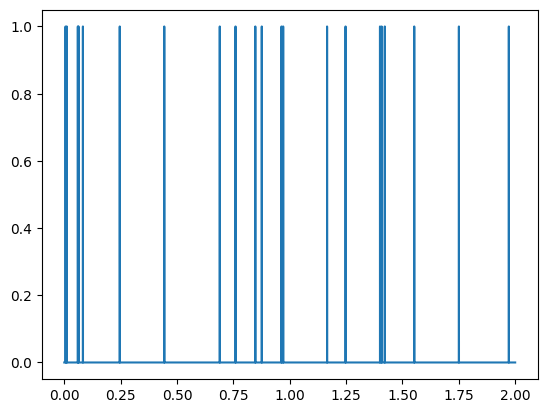

In [ ]:
like_geiger_wave.plot()

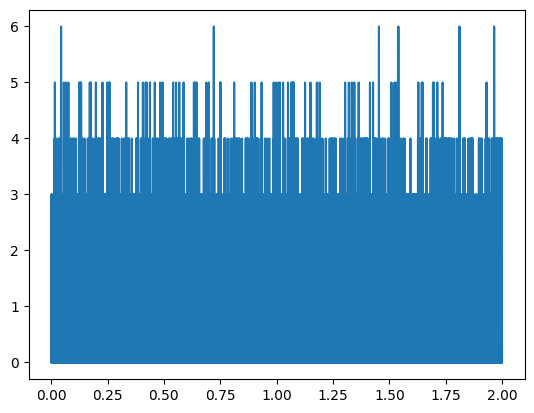

In [ ]:
like_white_noise_wave.plot()

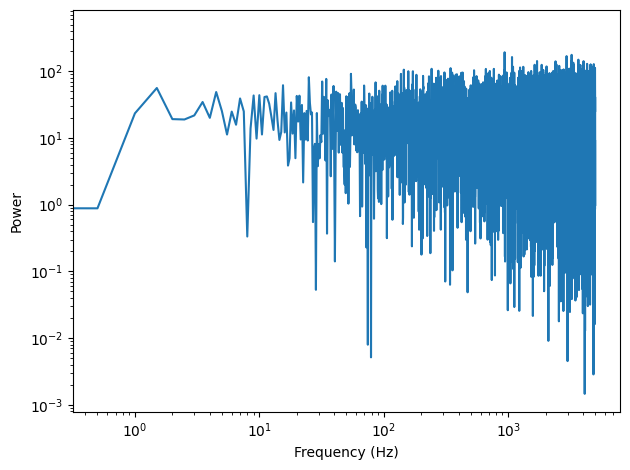

In [ ]:
like_geiger_spectrum = like_geiger_wave.make_spectrum()
like_geiger_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
like_geiger_spectrum.estimate_slope().slope

-0.003468661828287209

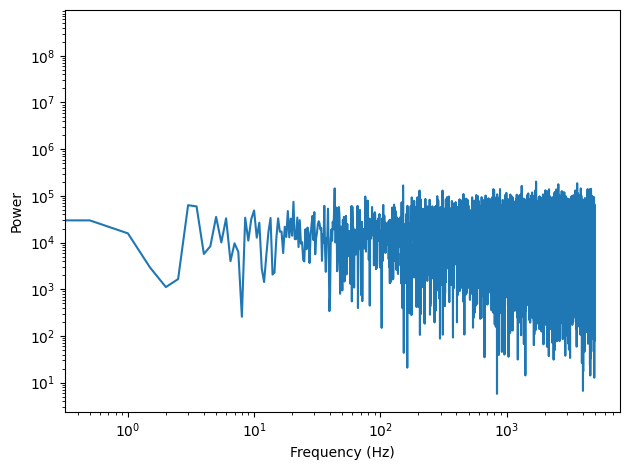

In [ ]:
like_white_noise_spectrum = like_white_noise_wave.make_spectrum()
like_white_noise_spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
like_white_noise_spectrum.estimate_slope().slope

-0.00020172775114797614

Как мы видим из полученных данных оба сигнала имеют уклон ~0, в связи с чем их можно считать белым шумом.

# **Упражнение 4.5**
В этой главе алгоритм для генерации розового шума концептуально простой, но затратный. Существует более эффективные варианты, например алгоритм Voss-McCartney. Изучите этот способ, реализуйте его, вычислите спектр результата и убедитесь, что соотношения между мощностью и частотой соответствующие.

In [ ]:
def voss(nrows, ncols=16):
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)

    cols = np.random.geometric(0.5, nrows)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=nrows)
    array[rows, cols] = np.random.random(nrows)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

Проверим его на примере с 11500 значениями

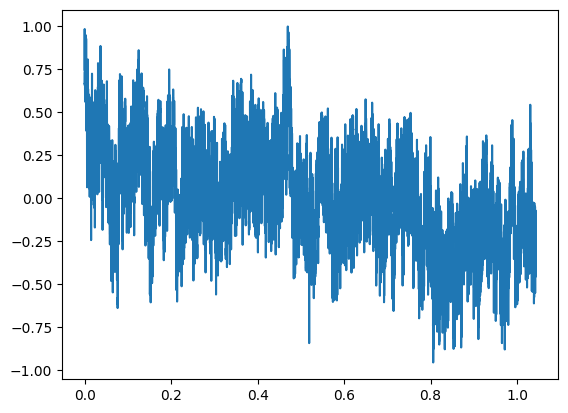

In [ ]:
ys = voss(11500)
wave = Wave(ys)
wave.unbias()
wave.normalize()
wave.plot()

In [ ]:
wave.make_audio()

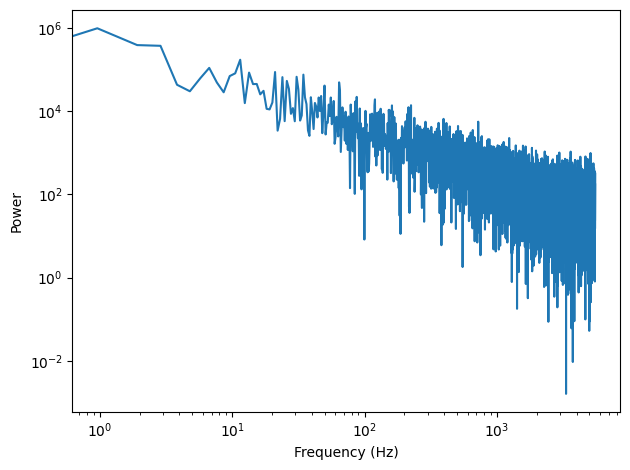

In [ ]:
spectrum = wave.make_spectrum()
spectrum.hs[0] = 0
spectrum.plot_power()
decorate(xlabel='Frequency (Hz)', ylabel='Power', **loglog)

In [ ]:
spectrum.estimate_slope().slope

-1.0274850201358843

Можно заметить, что уклон равен -1, а это значит, что получился розовый шум.